In [207]:
import os
import json
from typing import Dict, List, Optional, Union, cast
import requests

from env import github_token, github_username
import acquire
import re
import pandas as pd
from bs4 import BeautifulSoup
import time
import unicodedata
import numpy as np

In [2]:
urls = acquire.create_urls(num=100)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
['https://github.com/search?p=1&q=%23defi&type=Repositories', 'https://github.com/search?p=2&q=%23defi&type=Repositories', 'https://github.com/search?p=3&q=%23defi&type=Repositories', 'https://github.com/search?p=4&q=%23defi&type=Repositories', 'https://github.com/search?p=5&q=%23defi&type=Repositories', 'https://github.com/search?p=6&q=%23defi&type=Repositories', 'https://github.com/search?p=7&q=%23defi&type=Repositories', 'https://github.com/search?p=8&q=%23defi&type=Repositories', 'https://github.com/search?p=9&q=%23defi&type=Repositories', 'https://github.com/search?p=10&q=%23defi&type=Repositori

In [4]:
urls

['https://github.com/search?p=1&q=%23defi&type=Repositories',
 'https://github.com/search?p=2&q=%23defi&type=Repositories',
 'https://github.com/search?p=3&q=%23defi&type=Repositories',
 'https://github.com/search?p=4&q=%23defi&type=Repositories',
 'https://github.com/search?p=5&q=%23defi&type=Repositories',
 'https://github.com/search?p=6&q=%23defi&type=Repositories',
 'https://github.com/search?p=7&q=%23defi&type=Repositories',
 'https://github.com/search?p=8&q=%23defi&type=Repositories',
 'https://github.com/search?p=9&q=%23defi&type=Repositories',
 'https://github.com/search?p=10&q=%23defi&type=Repositories',
 'https://github.com/search?p=11&q=%23defi&type=Repositories',
 'https://github.com/search?p=12&q=%23defi&type=Repositories',
 'https://github.com/search?p=13&q=%23defi&type=Repositories',
 'https://github.com/search?p=14&q=%23defi&type=Repositories',
 'https://github.com/search?p=15&q=%23defi&type=Repositories',
 'https://github.com/search?p=16&q=%23defi&type=Repositories',
 

In [7]:
enumerate(urls)

In [56]:
ep = acquire.get_endpoints(urls)

InvalidSchema: No connection adapters were found for "['https://github.com/search?p=1&q=%23defi&type=Repositories', 'https://github.com/search?p=2&q=%23defi&type=Repositories', 'https://github.com/search?p=3&q=%23defi&type=Repositories', 'https://github.com/search?p=4&q=%23defi&type=Repositories', 'https://github.com/search?p=5&q=%23defi&type=Repositories', 'https://github.com/search?p=6&q=%23defi&type=Repositories', 'https://github.com/search?p=7&q=%23defi&type=Repositories', 'https://github.com/search?p=8&q=%23defi&type=Repositories', 'https://github.com/search?p=9&q=%23defi&type=Repositories', 'https://github.com/search?p=10&q=%23defi&type=Repositories', 'https://github.com/search?p=11&q=%23defi&type=Repositories', 'https://github.com/search?p=12&q=%23defi&type=Repositories', 'https://github.com/search?p=13&q=%23defi&type=Repositories', 'https://github.com/search?p=14&q=%23defi&type=Repositories', 'https://github.com/search?p=15&q=%23defi&type=Repositories', 'https://github.com/search?p=16&q=%23defi&type=Repositories', 'https://github.com/search?p=17&q=%23defi&type=Repositories', 'https://github.com/search?p=18&q=%23defi&type=Repositories', 'https://github.com/search?p=19&q=%23defi&type=Repositories', 'https://github.com/search?p=20&q=%23defi&type=Repositories', 'https://github.com/search?p=21&q=%23defi&type=Repositories', 'https://github.com/search?p=22&q=%23defi&type=Repositories', 'https://github.com/search?p=23&q=%23defi&type=Repositories', 'https://github.com/search?p=24&q=%23defi&type=Repositories', 'https://github.com/search?p=25&q=%23defi&type=Repositories', 'https://github.com/search?p=26&q=%23defi&type=Repositories', 'https://github.com/search?p=27&q=%23defi&type=Repositories', 'https://github.com/search?p=28&q=%23defi&type=Repositories', 'https://github.com/search?p=29&q=%23defi&type=Repositories', 'https://github.com/search?p=30&q=%23defi&type=Repositories', 'https://github.com/search?p=31&q=%23defi&type=Repositories', 'https://github.com/search?p=32&q=%23defi&type=Repositories', 'https://github.com/search?p=33&q=%23defi&type=Repositories', 'https://github.com/search?p=34&q=%23defi&type=Repositories', 'https://github.com/search?p=35&q=%23defi&type=Repositories', 'https://github.com/search?p=36&q=%23defi&type=Repositories', 'https://github.com/search?p=37&q=%23defi&type=Repositories', 'https://github.com/search?p=38&q=%23defi&type=Repositories', 'https://github.com/search?p=39&q=%23defi&type=Repositories', 'https://github.com/search?p=40&q=%23defi&type=Repositories', 'https://github.com/search?p=41&q=%23defi&type=Repositories', 'https://github.com/search?p=42&q=%23defi&type=Repositories', 'https://github.com/search?p=43&q=%23defi&type=Repositories', 'https://github.com/search?p=44&q=%23defi&type=Repositories', 'https://github.com/search?p=45&q=%23defi&type=Repositories', 'https://github.com/search?p=46&q=%23defi&type=Repositories', 'https://github.com/search?p=47&q=%23defi&type=Repositories', 'https://github.com/search?p=48&q=%23defi&type=Repositories', 'https://github.com/search?p=49&q=%23defi&type=Repositories', 'https://github.com/search?p=50&q=%23defi&type=Repositories', 'https://github.com/search?p=51&q=%23defi&type=Repositories', 'https://github.com/search?p=52&q=%23defi&type=Repositories', 'https://github.com/search?p=53&q=%23defi&type=Repositories', 'https://github.com/search?p=54&q=%23defi&type=Repositories', 'https://github.com/search?p=55&q=%23defi&type=Repositories', 'https://github.com/search?p=56&q=%23defi&type=Repositories', 'https://github.com/search?p=57&q=%23defi&type=Repositories', 'https://github.com/search?p=58&q=%23defi&type=Repositories', 'https://github.com/search?p=59&q=%23defi&type=Repositories', 'https://github.com/search?p=60&q=%23defi&type=Repositories', 'https://github.com/search?p=61&q=%23defi&type=Repositories', 'https://github.com/search?p=62&q=%23defi&type=Repositories', 'https://github.com/search?p=63&q=%23defi&type=Repositories', 'https://github.com/search?p=64&q=%23defi&type=Repositories', 'https://github.com/search?p=65&q=%23defi&type=Repositories', 'https://github.com/search?p=66&q=%23defi&type=Repositories', 'https://github.com/search?p=67&q=%23defi&type=Repositories', 'https://github.com/search?p=68&q=%23defi&type=Repositories', 'https://github.com/search?p=69&q=%23defi&type=Repositories', 'https://github.com/search?p=70&q=%23defi&type=Repositories', 'https://github.com/search?p=71&q=%23defi&type=Repositories', 'https://github.com/search?p=72&q=%23defi&type=Repositories', 'https://github.com/search?p=73&q=%23defi&type=Repositories', 'https://github.com/search?p=74&q=%23defi&type=Repositories', 'https://github.com/search?p=75&q=%23defi&type=Repositories', 'https://github.com/search?p=76&q=%23defi&type=Repositories', 'https://github.com/search?p=77&q=%23defi&type=Repositories', 'https://github.com/search?p=78&q=%23defi&type=Repositories', 'https://github.com/search?p=79&q=%23defi&type=Repositories', 'https://github.com/search?p=80&q=%23defi&type=Repositories', 'https://github.com/search?p=81&q=%23defi&type=Repositories', 'https://github.com/search?p=82&q=%23defi&type=Repositories', 'https://github.com/search?p=83&q=%23defi&type=Repositories', 'https://github.com/search?p=84&q=%23defi&type=Repositories', 'https://github.com/search?p=85&q=%23defi&type=Repositories', 'https://github.com/search?p=86&q=%23defi&type=Repositories', 'https://github.com/search?p=87&q=%23defi&type=Repositories', 'https://github.com/search?p=88&q=%23defi&type=Repositories', 'https://github.com/search?p=89&q=%23defi&type=Repositories', 'https://github.com/search?p=90&q=%23defi&type=Repositories', 'https://github.com/search?p=91&q=%23defi&type=Repositories', 'https://github.com/search?p=92&q=%23defi&type=Repositories', 'https://github.com/search?p=93&q=%23defi&type=Repositories', 'https://github.com/search?p=94&q=%23defi&type=Repositories', 'https://github.com/search?p=95&q=%23defi&type=Repositories', 'https://github.com/search?p=96&q=%23defi&type=Repositories', 'https://github.com/search?p=97&q=%23defi&type=Repositories', 'https://github.com/search?p=98&q=%23defi&type=Repositories', 'https://github.com/search?p=99&q=%23defi&type=Repositories', 'https://github.com/search?p=100&q=%23defi&type=Repositories']"

In [6]:
repos = acquire.make_all_endpoints()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
['https://github.com/search?p=1&q=%23defi&type=Repositories', 'https://github.com/search?p=2&q=%23defi&type=Repositories', 'https://github.com/search?p=3&q=%23defi&type=Repositories', 'https://github.com/search?p=4&q=%23defi&type=Repositories', 'https://github.com/search?p=5&q=%23defi&type=Repositories', 'https://github.com/search?p=6&q=%23defi&type=Repositories', 'https://github.com/search?p=7&q=%23defi&type=Repositories', 'https://github.com/search?p=8&q=%23defi&type=Repositories', 'https://github.com/search?p=9&q=%23defi&type=Repositories', 'https://github.com/search?p=10&q=%23defi&type=Repositori

/Users/jeremylagunas/codeup_ds/Blockchain_NLP/acquire.py:53: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 53 of the file /Users/jeremylagunas/codeup_ds/Blockchain_NLP/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


True
https://github.com/search?p=1&q=%23defi&type=Repositories
True
https://github.com/search?p=2&q=%23defi&type=Repositories
True
https://github.com/search?p=3&q=%23defi&type=Repositories
True
https://github.com/search?p=4&q=%23defi&type=Repositories
True
https://github.com/search?p=5&q=%23defi&type=Repositories
True
https://github.com/search?p=6&q=%23defi&type=Repositories
True
https://github.com/search?p=7&q=%23defi&type=Repositories
sleeping
sleeping
sleeping
True
https://github.com/search?p=8&q=%23defi&type=Repositories
True
https://github.com/search?p=9&q=%23defi&type=Repositories
True
https://github.com/search?p=10&q=%23defi&type=Repositories
True
https://github.com/search?p=11&q=%23defi&type=Repositories
True
https://github.com/search?p=12&q=%23defi&type=Repositories
True
https://github.com/search?p=13&q=%23defi&type=Repositories
True
https://github.com/search?p=14&q=%23defi&type=Repositories
True
https://github.com/search?p=15&q=%23defi&type=Repositories
True
https://github.co

In [9]:
len(repos)

100

In [10]:
repos

[['/OffcierCia/DeFi-Developer-Road-Map',
  '/smartcontractkit/full-blockchain-solidity-course-js',
  '/rainbow-me/rainbow',
  '/Bytom/bytom',
  '/DimensionDev/Maskbook',
  '/chainsulting/Smart-Contract-Security-Audits',
  '/ccyanxyz/uniswap-arbitrage-analysis',
  '/ong/awesome-decentralized-finance',
  '/OneKeyHQ/app-monorepo',
  '/WaykiChain/WaykiChain'],
 ['/JumpCrypto/crypto-reading-list',
  '/Synthetixio/synthetix',
  '/OffcierCia/ultimate-defi-research-base',
  '/studydefi/money-legos',
  '/curvefi/curve-contract',
  '/frankiefab100/Blockchain-Development-Resources',
  '/bekatom/awesome-ethereum',
  '/SunWeb3Sec/DeFiHackLabs',
  '/zeriontech/defi-sdk',
  '/BeamMW/beam'],
 ['/AcalaNetwork/Acala',
  '/uniswap-python/uniswap-python',
  '/makerdao/dss',
  '/web3brasil/web3brasil',
  '/ApeWorX/ape',
  '/OffcierCia/Crypto-OpSec-SelfGuard-RoadMap',
  '/TechRate/Smart-Contract-Audits',
  '/RabbyHub/Rabby',
  '/yearn/yearn-vaults',
  '/gauss314/defi'],
 ['/horizontalsystems/unstoppable-wal

In [17]:
def create_urls(num=100):
    ''' this function scrapes the #defi repositories from github and returns a list of urls
    '''
    num_of_pages=num

    page_numbers = [int(i) for i in range(1,num_of_pages+1)]
    print(page_numbers)
    urls = [f'https://github.com/search?p={i}&q=%23defi&type=Repositories' for i in page_numbers]

    print(urls)
    return urls

In [15]:
def make_all_endpoints():
    ''' This function returns all of the endpoints
    '''
    urls = create_urls()
    for url in urls:
        print(url)
    all_endpoints = []

    for i, page in enumerate(urls):
        all_endpoints.append(get_endpoints(page))
        print(page)

    print(len(all_endpoints))

    return all_endpoints

In [19]:
def get_endpoints(urls):
    ''' This function gets the endpoints from the list of above urls
    '''

    headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}
    
    while True:
        response = requests.get(urls, headers=headers)
        if response.ok:
            break
        else:
            print('sleeping')
            time.sleep(20)
            continue
    soup = BeautifulSoup(response.text)
    
    print(response.ok)

    endpoints = []
    subgroups = soup.find_all('div', {"class":"f4 text-normal"})

    for group in subgroups:
        endpoints.append(re.search('href=".*"', str(group))[0][6:-1])

    return endpoints

In [11]:
def acquire_endpoints():
    ''' This function acquires all endpoints and writes them to a csv.
    '''
    our_endpoints = pd.Series(make_all_endpoints(), name='endpoints')
    our_endpoints.to_csv('endpoints.csv', index=False)

    return our_endpoints

In [24]:
acquire_endpoints()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
['https://github.com/search?p=1&q=%23defi&type=Repositories', 'https://github.com/search?p=2&q=%23defi&type=Repositories', 'https://github.com/search?p=3&q=%23defi&type=Repositories', 'https://github.com/search?p=4&q=%23defi&type=Repositories', 'https://github.com/search?p=5&q=%23defi&type=Repositories', 'https://github.com/search?p=6&q=%23defi&type=Repositories', 'https://github.com/search?p=7&q=%23defi&type=Repositories', 'https://github.com/search?p=8&q=%23defi&type=Repositories', 'https://github.com/search?p=9&q=%23defi&type=Repositories', 'https://github.com/search?p=10&q=%23defi&type=Repositori

sleeping
sleeping
True
https://github.com/search?p=1&q=%23defi&type=Repositories
True
https://github.com/search?p=2&q=%23defi&type=Repositories
True
https://github.com/search?p=3&q=%23defi&type=Repositories
True
https://github.com/search?p=4&q=%23defi&type=Repositories
True
https://github.com/search?p=5&q=%23defi&type=Repositories
True
https://github.com/search?p=6&q=%23defi&type=Repositories
True
https://github.com/search?p=7&q=%23defi&type=Repositories
True
https://github.com/search?p=8&q=%23defi&type=Repositories
True
https://github.com/search?p=9&q=%23defi&type=Repositories
sleeping
sleeping
sleeping
True
https://github.com/search?p=10&q=%23defi&type=Repositories
True
https://github.com/search?p=11&q=%23defi&type=Repositories
True
https://github.com/search?p=12&q=%23defi&type=Repositories
True
https://github.com/search?p=13&q=%23defi&type=Repositories
True
https://github.com/search?p=14&q=%23defi&type=Repositories
True
https://github.com/search?p=15&q=%23defi&type=Repositories
True

0     [/OffcierCia/DeFi-Developer-Road-Map, /smartco...
1     [/JumpCrypto/crypto-reading-list, /Synthetixio...
2     [/AcalaNetwork/Acala, /uniswap-python/uniswap-...
3     [/horizontalsystems/unstoppable-wallet-android...
4     [/ialberquilla/aave-liquidation, /yieldfarming...
                            ...                        
95    [/untypedjay/defichain-blockrewards, /ethic-mo...
96    [/cusdt-LINK/alpha-subgraph, /CryptoCans/Front...
97    [/AnshuJalan/sizzler-network, /nusic-fm/nusic-...
98    [/ps-lightning/sandwich-trading-bot, /carterca...
99    [/0xpanoramix/uv3pe-js, /broxus/flatqube-front...
Name: endpoints, Length: 100, dtype: object

In [3]:
endpoints = pd.read_csv('endpoints.csv')

In [4]:
endpoints

endpoints
0   ['/OffcierCia/DeFi-Developer-Road-Map', '/smar...
1   ['/JumpCrypto/crypto-reading-list', '/Syntheti...
2   ['/AcalaNetwork/Acala', '/uniswap-python/unisw...
3   ['/horizontalsystems/unstoppable-wallet-androi...
4   ['/ialberquilla/aave-liquidation', '/yieldfarm...
..                                                ...
95  ['/untypedjay/defichain-blockrewards', '/ethic...
96  ['/cusdt-LINK/alpha-subgraph', '/CryptoCans/Fr...
97  ['/AnshuJalan/sizzler-network', '/nusic-fm/nus...
98  ['/ps-lightning/sandwich-trading-bot', '/carte...
99  ['/0xpanoramix/uv3pe-js', '/broxus/flatqube-fr...

[100 rows x 1 columns]

In [6]:
def flatten_endpoints():
    ''' This function flattens a 2d array into a 1d array
    '''
    end_points = pd.read_csv('endpoints.csv')
    all_values = []
    for value in end_points.values:
        for ep in value:
            all_values.append(ep)

    final_values = []
    #print(all_values)
    for value in all_values:
        for val in value.split("'"):
            if len(val) > 3:
                final_values.append(val)
                print(val)

    return pd.Series(final_values, name='endpoints')

In [7]:
endpoints = flatten_endpoints()

/OffcierCia/DeFi-Developer-Road-Map
/smartcontractkit/full-blockchain-solidity-course-js
/rainbow-me/rainbow
/Bytom/bytom
/DimensionDev/Maskbook
/chainsulting/Smart-Contract-Security-Audits
/ccyanxyz/uniswap-arbitrage-analysis
/ong/awesome-decentralized-finance
/OneKeyHQ/app-monorepo
/WaykiChain/WaykiChain
/JumpCrypto/crypto-reading-list
/Synthetixio/synthetix
/OffcierCia/ultimate-defi-research-base
/studydefi/money-legos
/curvefi/curve-contract
/frankiefab100/Blockchain-Development-Resources
/bekatom/awesome-ethereum
/SunWeb3Sec/DeFiHackLabs
/zeriontech/defi-sdk
/BeamMW/beam
/AcalaNetwork/Acala
/uniswap-python/uniswap-python
/makerdao/dss
/web3brasil/web3brasil
/ApeWorX/ape
/OffcierCia/Crypto-OpSec-SelfGuard-RoadMap
/TechRate/Smart-Contract-Audits
/RabbyHub/Rabby
/yearn/yearn-vaults
/gauss314/defi
/horizontalsystems/unstoppable-wallet-android
/yearn/yearn-protocol
/adrianmcli/eth95
/MoralisWeb3/unity-web3-game-kit
/horizontalsystems/unstoppable-wallet-ios
/paulrberg/prb-math
/flashbot

In [100]:
endpoints

0                    /OffcierCia/DeFi-Developer-Road-Map
1      /smartcontractkit/full-blockchain-solidity-cou...
2                                    /rainbow-me/rainbow
3                                           /Bytom/bytom
4                                 /DimensionDev/Maskbook
                             ...                        
995                        /preginald/cryptomite-backend
996                               /setheum-js/setheum.js
997                            /izumiFinance/izumi-veiZi
998                                    /danielssonn/dyve
999                      /buddle-finance/buddle-protocol
Name: endpoints, Length: 1000, dtype: object

In [8]:
REPOS = list(endpoints)

In [9]:
len(REPOS)

1000

In [10]:
REPOS

['/OffcierCia/DeFi-Developer-Road-Map',
 '/smartcontractkit/full-blockchain-solidity-course-js',
 '/rainbow-me/rainbow',
 '/Bytom/bytom',
 '/DimensionDev/Maskbook',
 '/chainsulting/Smart-Contract-Security-Audits',
 '/ccyanxyz/uniswap-arbitrage-analysis',
 '/ong/awesome-decentralized-finance',
 '/OneKeyHQ/app-monorepo',
 '/WaykiChain/WaykiChain',
 '/JumpCrypto/crypto-reading-list',
 '/Synthetixio/synthetix',
 '/OffcierCia/ultimate-defi-research-base',
 '/studydefi/money-legos',
 '/curvefi/curve-contract',
 '/frankiefab100/Blockchain-Development-Resources',
 '/bekatom/awesome-ethereum',
 '/SunWeb3Sec/DeFiHackLabs',
 '/zeriontech/defi-sdk',
 '/BeamMW/beam',
 '/AcalaNetwork/Acala',
 '/uniswap-python/uniswap-python',
 '/makerdao/dss',
 '/web3brasil/web3brasil',
 '/ApeWorX/ape',
 '/OffcierCia/Crypto-OpSec-SelfGuard-RoadMap',
 '/TechRate/Smart-Contract-Audits',
 '/RabbyHub/Rabby',
 '/yearn/yearn-vaults',
 '/gauss314/defi',
 '/horizontalsystems/unstoppable-wallet-android',
 '/yearn/yearn-proto

In [11]:
headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}

if headers["Authorization"] == "token " or headers["User-Agent"] == "":
    raise Exception(
        "You need to follow the instructions marked TODO in this script before trying to use it"
    )


In [12]:
def github_api_request(url: str) -> Union[List, Dict]:
    ''' This function makes requests from github and raises an error code if a specific error code is received.
    '''
    response = requests.get(url, headers=headers)
    response_data = response.json()
    if response.status_code != 200:
        raise Exception(
            f"Error response from github api! status code: {response.status_code}, "
            f"response: {json.dumps(response_data)}"
        )
    return response_data

In [13]:
def get_repo_language(repo: str) -> str:
    ''' This function fetches the language associated with a repository
    '''
    url = f"https://api.github.com/repos{repo}"
    repo_info = github_api_request(url)
    if type(repo_info) is dict:
        repo_info = cast(Dict, repo_info)
        if "language" not in repo_info:
            raise Exception(
                "'language' key not round in response\n{}".format(json.dumps(repo_info))
            )
        return repo_info["language"]
    raise Exception(
        f"Expecting a dictionary response from {url}, instead got {json.dumps(repo_info)}"
    )

In [14]:
def get_repo_contents(repo: str) -> List[Dict[str, str]]:
    ''' This function fetches the contents associated with a repo
    '''
    url = f"https://api.github.com/repos{REPOS}/contents/"
    contents = github_api_request(url)
    if type(contents) is list:
        contents = cast(List, contents)
        return contents
    raise Exception(
        f"Expecting a list response from {url}, instead got {json.dumps(contents)}"
    )

In [15]:
def get_readme_download_url(files: List[Dict[str, str]]) -> str:
    """
    Takes in a response from the github api that lists the files in a repo and
    returns the url that can be used to download the repo's README file.
    """
    for file in files:
        if file["name"].lower().startswith("readme"):
            return file["download_url"]
    return ""

In [117]:
'''
def process_repo(repo: str) -> Dict[str, str]:
    """
    Takes a repo name like "gocodeup/codeup-setup-script" and returns a
    dictionary with the language of the repo and the readme contents.
    """
    contents = get_repo_contents(repo)
    readme_contents = requests.get(get_readme_download_url(contents)).text
    return {
        "repo": repo,
        "language": get_repo_language(repo),
        "readme_contents": readme_contents,
    }
    '''

In [16]:
def process_repo(repo: str) -> Dict[str, str]:
    """
    Takes a repo name like "gocodeup/codeup-setup-script" and returns a
    dictionary with the language of the repo and the readme contents.
    """
    contents = get_repo_contents(repo)
    readme_download_url = get_readme_download_url(contents)
    if readme_download_url == "":
        readme_contents = ""
    else:
        response = requests.get(readme_download_url)
        print(readme_download_url)
        print(response.status_code)
        readme_contents = requests.get(readme_download_url).text
        
    return {
        "repo": repo,
        "language": get_repo_language(repo),
        "readme_contents": readme_contents,
    }

In [17]:
'''
def scrape_github_data() -> List[Dict[str, str]]:
    """
    Loop through all of the repos and process them. Returns the processed data.
    """
        
    return [process_repo(repo) for repo in REPOS]
    '''

In [ ]:
'''
def scrape_github_data() -> List[Dict[str, str]]:
    """
    Loop through all of the repos and process them. Returns the processed data.
    """
    
    output = []
    for repo in REPOS:
        print(repo)
        url = f"https://api.github.com/repos{repo}/contents/"
        
        response = requests.get(url)
        
        if response.status_code != 200:
            print(f"Skipping {repo} because its HTTP status code is {response.status_code}")
            continue
        
        contents = response.json()
        readme_download_url = get_readme_download_url(contents)
        
        if readme_download_url == "":
            readme_contents = ""
        else:
            readme_contents = requests.get(readme_download_url).text
        result = {
            "repo": repo,
            "language": get_repo_language(repo),
            "readme_contents": readme_contents,
        }
    
        output.append(result)
        
    return output
    '''

In [21]:
def scrape_github_data() -> List[Dict[str, str]]:
    """
    Loop through all of the repos and process them. Returns the processed data.
    """
    
    output = []
    for repo in REPOS:
        
        url = f"https://api.github.com/repos{repo}/contents/"
        
        response = requests.get(url, headers=headers)
        
        if response.status_code != 200:
            print(f"Skipping {repo} because its HTTP status code is {response.status_code}")
            continue
        
        contents = response.json()
        readme_download_url = get_readme_download_url(contents)
        
        if readme_download_url == "":
            readme_contents = ""
        else:
            response = requests.get(readme_download_url)
            if response.status_code != 200:
                print(f"Skipping {repo} because its HTTP status code is {response.status_code}")
                continue
            readme_contents = requests.get(readme_download_url).text
        print(repo)
        result = {
            "repo": repo,
            "language": get_repo_language(repo),
            "readme_contents": readme_contents,
        }
    
        output.append(result)
        
    return output

In [23]:
data = scrape_github_data()

/OffcierCia/DeFi-Developer-Road-Map
/smartcontractkit/full-blockchain-solidity-course-js
/rainbow-me/rainbow
/Bytom/bytom
/DimensionDev/Maskbook
/chainsulting/Smart-Contract-Security-Audits
/ccyanxyz/uniswap-arbitrage-analysis
/ong/awesome-decentralized-finance
/OneKeyHQ/app-monorepo
/WaykiChain/WaykiChain
/JumpCrypto/crypto-reading-list
/Synthetixio/synthetix
/OffcierCia/ultimate-defi-research-base
/studydefi/money-legos
/curvefi/curve-contract
/frankiefab100/Blockchain-Development-Resources
/bekatom/awesome-ethereum
/SunWeb3Sec/DeFiHackLabs
/zeriontech/defi-sdk
/BeamMW/beam
/AcalaNetwork/Acala
/uniswap-python/uniswap-python
/makerdao/dss
/web3brasil/web3brasil
/ApeWorX/ape
/OffcierCia/Crypto-OpSec-SelfGuard-RoadMap
/TechRate/Smart-Contract-Audits
/RabbyHub/Rabby
/yearn/yearn-vaults
/gauss314/defi
/horizontalsystems/unstoppable-wallet-android
/yearn/yearn-protocol
/adrianmcli/eth95
/MoralisWeb3/unity-web3-game-kit
/horizontalsystems/unstoppable-wallet-ios
/paulrberg/prb-math
/flashbot

/deusfinance/app-ui
/tamago-finance/tamago-finance
/gluwa/creditcoin-legacy
/dekz/defi-test-stack
/cbisaillon/Scrypto-Advent-Calendar
/JellyfishSDK/whale
/ChainSafe/PINT
/bugout-dev/moonworm
/sora-xor/sora2-network
/RubyRedOwl08/defi-trading-bot
/Wallet3/Wallet3
/bet-no-loss/bet-no-loss
/bonedaddy/go-blocknative
/mushroomsforest/deployment
/xBidi/PancakeSwapPredictionBot
/bifrost-platform/BIFI
/Setheum-Labs/Setheum
/Lucas-Kohorst/awesome-defi
/alice-si/alice-v2-monorepo
/Anish-Agnihotri/stat.farm
/defiwrapper/defiwrapper
/eoscostarica/evodex
/vikvikvikkk/Web3
/re-nft/legacy-front
/izumiFinance/izumi-uniV3Mining
/poocart/lend721
/glonlas/Learn-blockchains-Web3-dApps
/0xDaksh/defi-playground
/PunkFinance/punk.protocol
/AUGMXNT/perfi
/NotANameServer/challenges
/AlaskaLabs/unlearn.day
/powerpool-finance/powerpool-docs
/jontstaz/Automated-BSC-Buy-Sell-Token-Sniper
/Polkamarkets/polkamarkets-web
/Jonah246/tfusd-flashloan-attack-write-up
/RubiconDeFi/rubicon_protocol
/laminar-protocol/flow-pr

/fsn-dev/fsn-faucet
/ZeroPointThree17/radbag-wallet
/ApeAcademy/ERC20
/Coin-Port/CoinPort
/distributed-ledger-technology/vofarm
/Celsians/celswap-interface
/Sovryn-Origins/origins
/sebastiantf/yield-nft
/realnimish/avalanche-amm
/sovreign-protocol/sovreign-contracts
/gokhanmelma/easy-staking-contracts
/phanlancer/keykey-contracts
/CitizenDAO/Impact-Protocol
/plasmadlt/staking-factory
/Konjungate/Konjungate-Core
/masaun/GLM-stake-pool
/Web3ID/web3id
/yam-finance/synths-sdk
/giddyphysicist/ParallelSwapForRefFinance
/kadirpekel/algorig
/mangofarmbsc/mango-farm
/krdinal/CryptoFraud
/EthereansOS/Covenants-Core
/fsn-dev/awesome-fusion
/raphael-mazet/simplefi-server
/ankurdubey521/HurriCARE
/gmguild/gmJEWEL
/preston4896/Minecraft-NFT-Server
/apeboard/pools
/Hover-Labs/kolibri-contracts
/onuratakan/mix_blockchain
/Frenzoid/DAPP_Bank
/wuwe1/damn-vulnerable-defi-brownie
/DeFireX/defirex-protocol-v3
/levelkdev/swapr-sdk
/Coinversation/coinpro
/iJrod/Learn-Smart-Contracts-and-Tokens
/centfinance/S

/Jupyter-Network/Jupyter-Swap
/freight-trust/token-api
/afmsavage/keepcli
/Planxnx/defi-tx-kit
/frenchie-foundation/frenchie
/cusdt-LINK/alpha-swap-token-list
/SachinCoder1/Learn-DeFi-with-Me
/noraliucode/opyn-taco
/Celsians/celswap-periphery
/DigiMancer3D/Defi2
/GigameshGarages/ReefNet
/ironminter/shabushabu-ui
/garyb9/kosho-coin
/MagiBridge/MagiBridge
/AlkemiNetwork/alkemi-content
/DeFipedia/defipedia.exchange
/viaMover/holyheld-landing-v1
/nymmrx/yv2
/wise-foundation/wise-website-requests
/0xPilou/DebtFlashSwap
/Garinmckayl/KoKoRo
/izumiFinance/izumi-bridge
/gokulnair2001/BuyMeAChai
/0ptim/DeFiChain-Wiki
/Contribute-Defi/website
/MaghrebCoin/Repository
/pooltogether/v4-admin-dashboard
/powerpool-finance/powerpool-vaults
/complusnetwork/complus-master-bsc
/QuantaEx/projectsite
/freight-trust/NACHA
/masaun/nexus-reinsurance
/complusnetwork/blocks-heco
/cusdt-LINK/alphadao-presskit
/alexgo-io/alex-v1-docs
/zincoshine/decofi
/bloxster/eidoo
/mcdexio/mai-fund-protocol
/duck-fi/contracts


[{'repo': '/OffcierCia/DeFi-Developer-Road-Map',
  'language': None,
  'readme_contents': '# DeFi Developer Road Map\n\n**Here we collect and discuss the best DeFi & Blockchain researches and tools - contributions are welcome.**\n\n**Feel free to submit a pull request, with anything from small fixes to translations, docs or tools you\'d like to add.**\n\n\n## Support Me:\n\nSupport is **very** important to me, with it I can do what I love - educating DeFi & Crypto users :sparkling_heart:  First, a few words, dear friends... I want to thank everyone who sent me donations! Much much thanks to you, I was able to bear the loss of my last job, found new meaning of life, and finally started writing a lot!\n\nThe best thing is to support me directly by donating to my address on Ethereum Main-net or any of the compatible networks or to any address from the list below:\n\n[![Supported by GitCoin](https://img.shields.io/badge/Support%20via-GitCoin-yellowgreen)](https://gitcoin.co/grants/3150/def
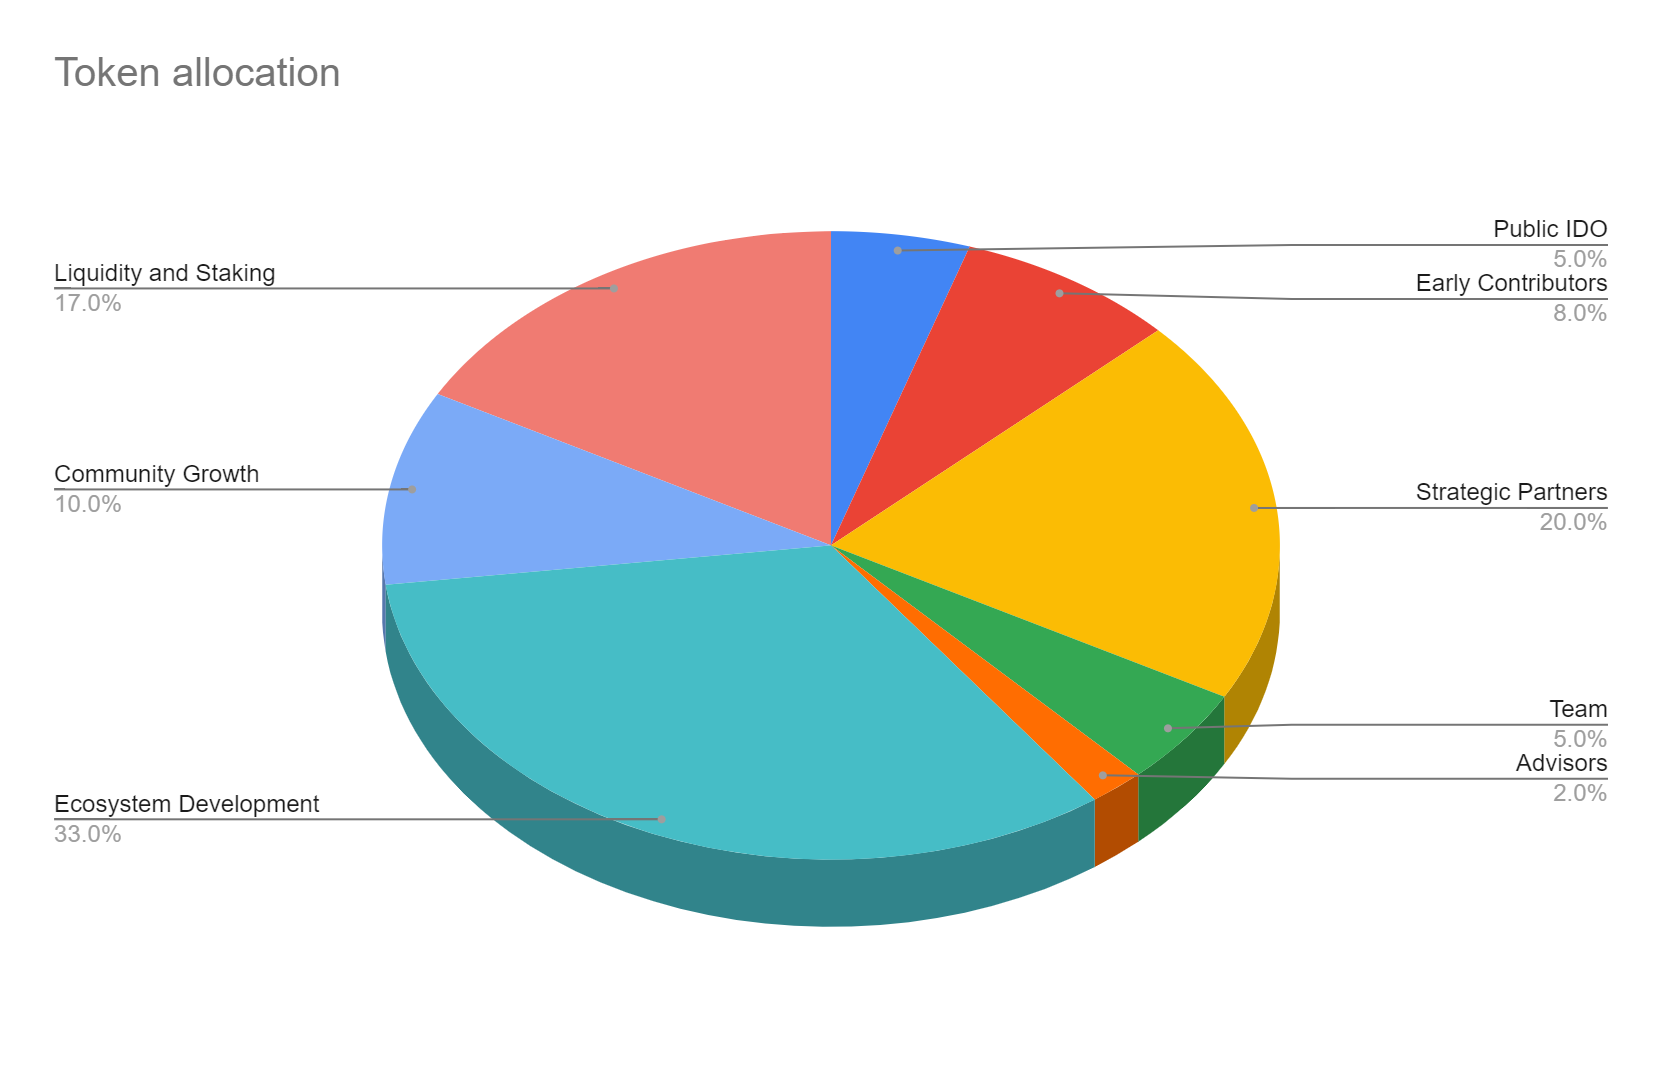
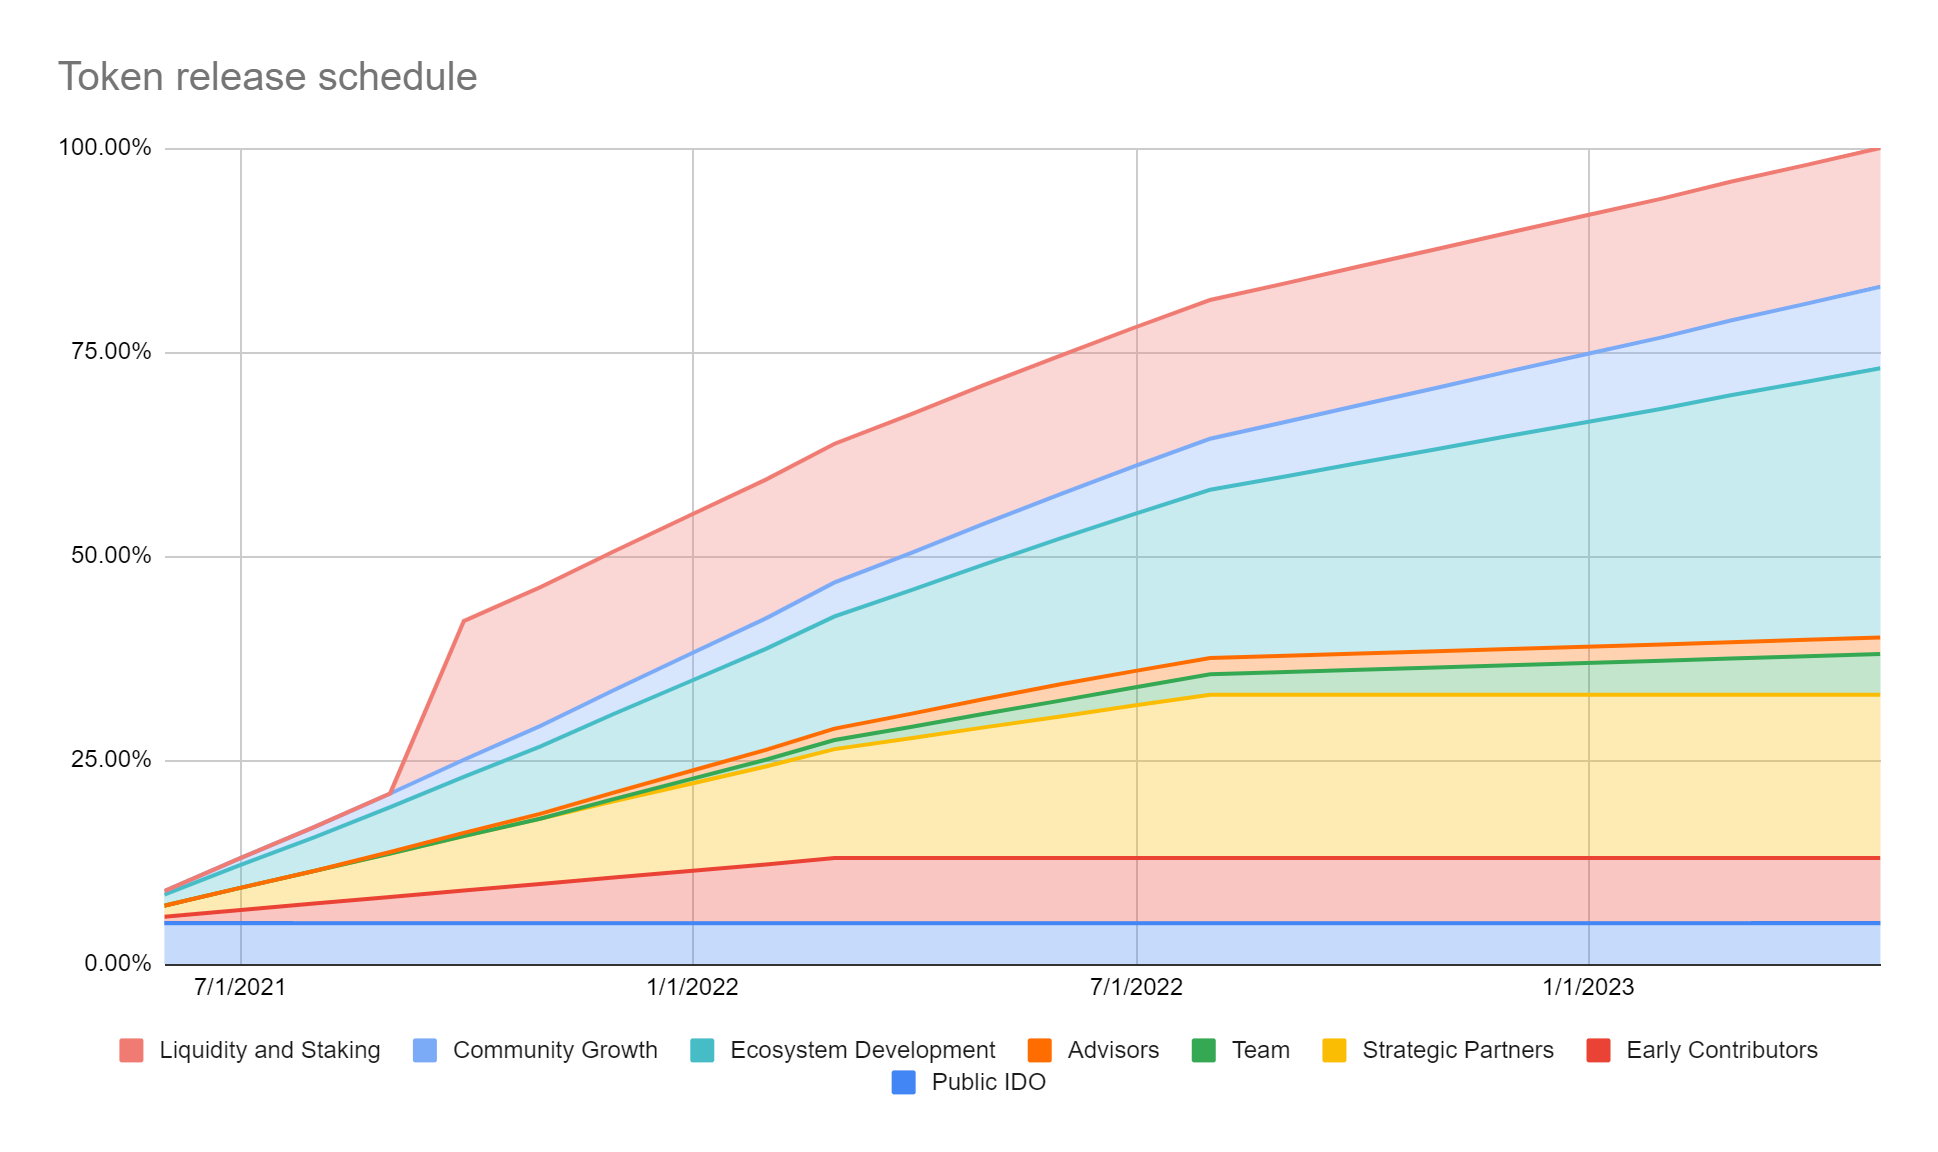

In [38]:
data

In [27]:
df = pd.DataFrame.from_dict(data)

In [28]:
df

repo    language  \
0                  /OffcierCia/DeFi-Developer-Road-Map        None   
1    /smartcontractkit/full-blockchain-solidity-cou...        None   
2                                  /rainbow-me/rainbow  TypeScript   
3                                         /Bytom/bytom          Go   
4                               /DimensionDev/Maskbook  TypeScript   
..                                                 ...         ...   
995                      /preginald/cryptomite-backend      Python   
996                             /setheum-js/setheum.js  TypeScript   
997                          /izumiFinance/izumi-veiZi  JavaScript   
998                                  /danielssonn/dyve  TypeScript   
999                    /buddle-finance/buddle-protocol    Solidity   

                                       readme_contents  
0    # DeFi Developer Road Map\n\n**Here we collect...  
1    <!-- [YouTube Video](https://www.youtube.com/w...  
2    ![](https://pbs.twimg.com/profile_banners/1103...  
3    Bytom\n======\n\n[![Build Status](https://trav...  
4    <!-- cspell:disable -->\n<!-- markdownlint-dis...  
..                                                 ...  
995  # Cryptomite\nCryptomite is a set of tools and...  
996  ![license](https://img.shields.io/badge/Licens...  
997  # Contracts for veiZi-NFT\n\n## veiZi-NFT Econ...  
998  ## Scaffolding the client with Vite and Tailwi...  
999  # Advanced Sample Hardhat Project\n\nThis proj...  

[1000 rows x 3 columns]

In [41]:
df.to_csv('repo_df.csv')

In [31]:
df.language.value_counts()

JavaScript          241
TypeScript          223
Solidity            167
Python               61
Rust                 30
HTML                 25
Go                   25
C++                  12
CSS                  12
C#                   11
Vue                  11
Jupyter Notebook     10
Shell                10
SCSS                  5
Java                  5
Kotlin                4
Swift                 3
TeX                   2
Racket                2
Elixir                2
Clojure               2
Dockerfile            1
Haskell               1
Ruby                  1
Nim                   1
Motoko                1
PLpgSQL               1
Cairo                 1
Vyper                 1
Scala                 1
Clarity               1
Tcl                   1
q                     1
Elm                   1
PHP                   1
Name: language, dtype: int64

In [32]:
# How many repos have "None" as language
1000 - df.language.value_counts().sum()

123

In [83]:
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

In [63]:
def no_special_char(x):
    x = re.sub(r"[^a-zA-Z0-9'\s]", '', x)
    return x

In [65]:
df.readme_contents = df.readme_contents.apply(no_special_char)

In [66]:
df

repo    language  \
0                  /OffcierCia/DeFi-Developer-Road-Map        None   
1    /smartcontractkit/full-blockchain-solidity-cou...        None   
2                                  /rainbow-me/rainbow  TypeScript   
3                                         /Bytom/bytom          Go   
4                               /DimensionDev/Maskbook  TypeScript   
..                                                 ...         ...   
995                      /preginald/cryptomite-backend      Python   
996                             /setheum-js/setheum.js  TypeScript   
997                          /izumiFinance/izumi-veiZi  JavaScript   
998                                  /danielssonn/dyve  TypeScript   
999                    /buddle-finance/buddle-protocol    Solidity   

                                       readme_contents  
0     DeFi Developer Road Map\n\nHere we collect an...  
1     YouTube VideohttpswwwyoutubecomwatchvM576WGiD...  
2    httpspbstwimgcomprofilebanners1103191459409420...  
3    Bytom\n\n\nBuild StatushttpstravisciorgBytomby...  
4     cspelldisable \n markdownlintdisable noinline...  
..                                                 ...  
995   Cryptomite\nCryptomite is a set of tools and ...  
996  licensehttpsimgshieldsiobadgeLicenseApache2020...  
997   Contracts for veiZiNFT\n\n veiZiNFT Economic ...  
998   Scaffolding the client with Vite and Tailwind...  
999   Advanced Sample Hardhat Project\n\nThis proje...  

[1000 rows x 3 columns]

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1000 non-null   object
 1   language         877 non-null    object
 2   readme_contents  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [67]:
def tokenator(x):
    tokenizer = nltk.tokenize.ToktokTokenizer()
    return tokenizer.tokenize(x, return_str=True)

In [69]:
df.readme_contents = df.readme_contents.apply(tokenator)

In [84]:
wnl = nltk.stem.WordNetLemmatizer()

In [85]:
def when_life_gives_you_lemmans(x):
    lemmas = [wnl.lemmatize(word) for word in x.split()]
    x_lemmatized = ' '.join(lemmas)
    
    return x_lemmatized

In [87]:
df.readme_contents = df.readme_contents.apply(when_life_gives_you_lemmans)

In [89]:
stopword_list = stopwords.words('english')

stopword_list.remove('no')
stopword_list.remove('not')

In [90]:
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [93]:
def you_shall_not_pass(x):
    words = x.split()
    filtered_words = [w for w in words if w not in stopword_list]
    x_without_stopwords = ' '.join(filtered_words)
    return x_without_stopwords

In [95]:
df.readme_contents = df.readme_contents.apply(you_shall_not_pass)

In [96]:
df

repo    language  \
0                  /OffcierCia/DeFi-Developer-Road-Map        None   
1    /smartcontractkit/full-blockchain-solidity-cou...        None   
2                                  /rainbow-me/rainbow  TypeScript   
3                                         /Bytom/bytom          Go   
4                               /DimensionDev/Maskbook  TypeScript   
..                                                 ...         ...   
995                      /preginald/cryptomite-backend      Python   
996                             /setheum-js/setheum.js  TypeScript   
997                          /izumiFinance/izumi-veiZi  JavaScript   
998                                  /danielssonn/dyve  TypeScript   
999                    /buddle-finance/buddle-protocol    Solidity   

                                       readme_contents  
0    DeFi Developer Road Map Here collect discus be...  
1    YouTube VideohttpswwwyoutubecomwatchvM576WGiDB...  
2    httpspbstwimgcomprofilebanners1103191459409420...  
3    Bytom Build StatushttpstravisciorgBytombytomsv...  
4    cspelldisable markdownlintdisable noinlinehtml...  
..                                                 ...  
995  Cryptomite Cryptomite set tool tracker get sta...  
996  licensehttpsimgshieldsiobadgeLicenseApache2020...  
997  Contracts veiZiNFT veiZiNFT Economic Model Des...  
998  Scaffolding client Vite Tailwind cd client npm...  
999  Advanced Sample Hardhat Project This project d...  

[1000 rows x 3 columns]

In [104]:
df["language"].fillna("Not Specified", inplace = True)

In [105]:
df

repo       language  \
0                  /OffcierCia/DeFi-Developer-Road-Map  Not Specified   
1    /smartcontractkit/full-blockchain-solidity-cou...  Not Specified   
2                                  /rainbow-me/rainbow     TypeScript   
3                                         /Bytom/bytom             Go   
4                               /DimensionDev/Maskbook     TypeScript   
..                                                 ...            ...   
995                      /preginald/cryptomite-backend         Python   
996                             /setheum-js/setheum.js     TypeScript   
997                          /izumiFinance/izumi-veiZi     JavaScript   
998                                  /danielssonn/dyve     TypeScript   
999                    /buddle-finance/buddle-protocol       Solidity   

                                       readme_contents  
0    DeFi Developer Road Map Here collect discus be...  
1    YouTube VideohttpswwwyoutubecomwatchvM576WGiDB...  
2    httpspbstwimgcomprofilebanners1103191459409420...  
3    Bytom Build StatushttpstravisciorgBytombytomsv...  
4    cspelldisable markdownlintdisable noinlinehtml...  
..                                                 ...  
995  Cryptomite Cryptomite set tool tracker get sta...  
996  licensehttpsimgshieldsiobadgeLicenseApache2020...  
997  Contracts veiZiNFT veiZiNFT Economic Model Des...  
998  Scaffolding client Vite Tailwind cd client npm...  
999  Advanced Sample Hardhat Project This project d...  

[1000 rows x 3 columns]

# Using CSV provided by Lindy

In [100]:
df1 = pd.read_csv('clean_df.csv')

In [101]:
df1

repo    language  \
0                             /rainbow-me/rainbow  TypeScript   
1                                    /Bytom/bytom          Go   
2                          /DimensionDev/Maskbook  TypeScript   
3            /ccyanxyz/uniswap-arbitrage-analysis      Python   
4    /chainsulting/Smart-Contract-Security-Audits        HTML   
..                                            ...         ...   
846                              /anrid/traderbot  JavaScript   
847                          /reach-sh/humble-sdk  JavaScript   
848               /izumiFinance/izumi-iZiSwap-sdk  TypeScript   
849                  /cartercarlson/automated-cdp      Python   
850                       /fsn-dev/whallet-mobile         Vue   

                                       readme_contents  
0    http pb twimg com profile banner 1103191459409...  
1    bytom build status http travis ci org bytom by...  
2    cspell disable markdownlint disable inline htm...  
3    uniswap arbitrage analysis see readme en pdf 0...  
4    smart contract audit chainsulting smart contra...  
..                                                 ...  
846  create yield farming chart farming luna osmo l...  
847  humblesdk v2 0 0 header img src logo white svg...  
848  izumi iziswap sdk latest version sdk considere...  
849  carter carlson project still early stage devel...  
850  whallet project setup yarn install compiles ho...  

[851 rows x 3 columns]

In [172]:
df1 = df1.dropna()

In [173]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 850
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             850 non-null    object
 1   language         850 non-null    object
 2   readme_contents  850 non-null    object
dtypes: object(3)
memory usage: 26.6+ KB


In [103]:
df1.language.value_counts()

JavaScript          229
TypeScript          220
Solidity            163
Python               57
Rust                 32
Go                   25
HTML                 23
C++                  13
Shell                12
CSS                  11
Vue                  11
Jupyter Notebook     10
C#                   10
Java                  4
SCSS                  4
Swift                 3
Racket                2
Elixir                2
Clojure               2
Kotlin                2
Scala                 1
Dockerfile            1
TeX                   1
Haskell               1
Ruby                  1
Nim                   1
Motoko                1
Vyper                 1
Cairo                 1
PLpgSQL               1
PHP                   1
Clarity               1
Tcl                   1
q                     1
Elm                   1
Svelte                1
Name: language, dtype: int64

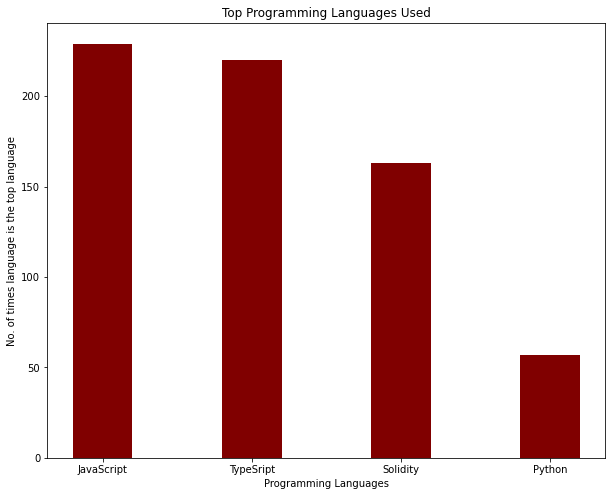

In [134]:
import matplotlib.pyplot as plt

data = {'JavaScript':229, 'TypeSript':220, 'Solidity':163,
        'Python':57}
languages = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 8))
 
# creating the bar plot
plt.bar(languages, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Programming Languages")
plt.ylabel("No. of times language is the top language")
plt.title("Top Programming Languages Used")
plt.show()

In [127]:
js = df1[df1.language == 'JavaScript']

In [130]:
ts = df1[df1.language == 'TypeScript']

In [137]:
solidity = df1[df1.language == 'Solidity']

In [139]:
python = df1[df1.language == 'Python']

In [140]:
js

repo    language  \
14             /Synthetixio/synthetix  JavaScript   
37     /ialberquilla/aave-liquidation  JavaScript   
40         /yieldfarming/yieldfarming  JavaScript   
45               /yearn/iearn-finance  JavaScript   
48       /manifoldfinance/defi-threat  JavaScript   
..                                ...         ...   
841                /AnshuJalan/newton  JavaScript   
844               /defistuff/web3-api  JavaScript   
845  /byteball/discount-stablecoin-aa  JavaScript   
846                  /anrid/traderbot  JavaScript   
847              /reach-sh/humble-sdk  JavaScript   

                                       readme_contents  
14   synthetix circleci http circleci com gh synthe...  
37   liquidation aave protocol example repository c...  
40   longer maintained repo longer maintained due d...  
45   iearn finance project wa bootstrapped create r...  
48   decentralized finance threat matrix v3 0 3 cur...  
..                                                 ...  
841  newton screenshot trading page http ibb co w7w...  
844  defistuff api api documentation run de project...  
845  autonomous agent discount stablecoins source c...  
846  create yield farming chart farming luna osmo l...  
847  humblesdk v2 0 0 header img src logo white svg...  

[229 rows x 3 columns]

In [142]:
def clean(text):
    #'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [174]:
js_words = clean(' '.join(df1[df1.language == 'JavaScript'].readme_contents))
ts_words = clean(' '.join(df1[df1.language == 'TypeScript'].readme_contents))
sol_words = clean(' '.join(df1[df1.language == 'Solidity'].readme_contents))
py_words = clean(' '.join(df1[df1.language == 'Python'].readme_contents))

In [184]:
all_words = clean(' '.join(df1.readme_contents))

In [197]:
def list_to_string(s):
 
    # initialize an empty string
    str1 = " "
   
    # return string 
    return (str1.join(s))

In [199]:
js_string = list_to_string(js_words)
ts_string = list_to_string(ts_words)
sol_string = list_to_string(sol_words)
py_string = list_to_string(py_words)
all_string = list_to_string(all_words)

In [200]:
all_string

'http pb twimg com profile banner 1103191459409420288 1573207178 1500x500 rainbow ethereum wallet life pocket available io app store http apps apple com u app rainbow ethereum wallet id1457119021 android beta available google play store http play google com store apps detail id rainbow follow u twitter http twitter com rainbowdotme setup general install nvm node j 14 http github com creationix nvm install project dependency yarn setup macos 1 install latest version xcode http developer apple com xcode 2 install watchman shell brew install watchman 3 install cocoapods shell sudo gem install cocoapods 4 install required bundle pod project shell yarn install bundle yarn install pod linux 1 install system dependency shell sudo apt install libsecret tool watchman 2 follow react native environment setup instruction http reactnative dev doc environment setup carefully involve installing android studio android sdk emulator etc making available path 3 ensure least one avd image http developer a

In [177]:
js_freq = pd.Series(js_words).value_counts()
ts_freq = pd.Series(ts_words).value_counts()
sol_freq = pd.Series(sol_words).value_counts()
py_freq = pd.Series(py_words).value_counts()

In [179]:
js_freq.head()

http        2872
com         1182
contract    1140
token        916
9            829
dtype: int64

In [180]:
ts_freq.head()

http        2544
com         1452
1            985
contract     906
github       786
dtype: int64

In [181]:
sol_freq.head()

http        1701
contract    1169
com          901
token        794
address      621
dtype: int64

In [182]:
py_freq.head()

http      617
token     554
com       333
python    292
key       262
dtype: int64

In [183]:
from pprint import pprint

## Term Frequency (TF)

In [201]:
# transform into a series
words = pd.Series(all_string.split())

# From the Series we can extract the value_counts, which is our raw count
# for term frequency. Once we have the raw counts, we can calculate the
# other measures.
(pd.DataFrame({'raw_count': words.value_counts()})
 .assign(frequency=lambda df: df.raw_count / df.raw_count.sum())
 .assign(augmented_frequency=lambda df: df.frequency / df.frequency.max()))


raw_count  frequency  augmented_frequency
http                 9584   0.025320             1.000000
com                  4826   0.012750             0.503548
contract             4049   0.010697             0.422475
token                3561   0.009408             0.371557
1                    2888   0.007630             0.301336
...                   ...        ...                  ...
loyst                   1   0.000003             0.000104
themeaganloyst          1   0.000003             0.000104
justine                 1   0.000003             0.000104
moore                   1   0.000003             0.000104
whallet                 1   0.000003             0.000104

[25164 rows x 3 columns]

## Inverse Document Frequency (IDF)

In [222]:
# A simple way to calculate idf for demonstration. Note that this
# function relies on the globally defined documents variable.
def idf(word):
    n_occurences = sum([1 for doc in readme_dict.values() if word in doc])
    return len(readme_dict) / n_occurences

In [217]:
readme_dict = df1.readme_contents.to_dict()

In [232]:
len(readme_dict)

850

In [223]:
# Get a list of the unique words
unique_words = pd.Series(' '.join(readme_dict.values()).split()).unique()

In [227]:
# put the unique words into a data frame
idf = (pd.DataFrame(dict(word=unique_words))
 

 # calculate the idf for each word
 .assign(idf=lambda df: df.word.apply(idf))
 
 
 # sort the data for presentation purposes
 .set_index('word')
 .sort_values(by='idf', ascending=False)
 .head(20))

In [230]:
idf.tail()

idf
word                                             
superrare                                   850.0
bscone                                      850.0
0xe1fa2f90618b2e37e03d6c8fbe19adc68714782f  850.0
oxaciano                                    850.0
0x803a0261275d30c7ab5eaa37f47fd044c5c633bb  850.0